In [1]:
import pandas as pd

import matplotlib.pyplot as plt

## for correlation matrices
import seaborn as sns
%matplotlib inline

## for linear models
import statsmodels.api as sm

In [75]:
## read the dataset mpg exercise.xls as df
## note that this is an xls file
df = pd.read_excel('mpg excercise.xls')
df.head()
df['Dropweight'] = df.Length / df.Weight
df['Tanktoweight'] = df.Fueltank / df.Weight
df['Wheelbasetoweight'] = df.Wheelbase / df.Weight
df

,MPG Highway,Passengers,Length,Wheelbase,Width,U Turn Space,Rear seat,Luggage,Weight,Horsepower,Fueltank,Dropweight,Tanktoweight,Wheelbasetoweight
0,31,5,177,102,68,37,26.5,11,2705,140,13.2,0.065434,0.004880,0.037708
1,25,5,195,115,71,38,30.0,15,3560,200,18.0,0.054775,0.005056,0.032303
2,26,5,180,102,67,37,28.0,14,3375,172,16.9,0.053333,0.005007,0.030222
3,26,6,193,106,70,37,31.0,17,3405,172,21.1,0.056681,0.006197,0.031131
4,30,4,186,109,69,39,27.0,13,3640,208,21.1,0.051099,0.005797,0.029945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,21,7,187,115,72,38,34.0,12,3960,109,21.1,0.047222,0.005328,0.029040
89,30,5,180,103,67,35,31.5,14,2985,134,18.5,0.060302,0.006198,0.034506
90,25,4,159,97,66,36,26.0,15,2810,178,18.5,0.056584,0.006584,0.034520
91,28,5,190,104,67,37,29.5,14,2985,114,15.8,0.063652,0.005293,0.034841


In [76]:
# Define the problem
df.columns = [col.replace(' ', '_') for col in df.columns]
outcome = 'MPG_Highway'
x_cols = df.drop(columns=outcome).columns

In [77]:
# Some brief preprocessing
for col in x_cols:
    ## This is called standard scaling 
    ## Here we don't have to do this but still it is a good practice
    df[col] = (df[col] - df[col].mean())/df[col].std()
df.head()

,MPG_Highway,Passengers,Length,Wheelbase,Width,U_Turn_Space,Rear_seat,Luggage,Weight,Horsepower,Fueltank,Dropweight,Tanktoweight,Wheelbasetoweight
0,31,-0.082794,-0.424883,-0.285386,-0.364210,-0.607145,-0.456945,-0.992270,-0.623674,-0.073088,-1.056458,0.475759,-1.152837,0.537832
1,25,-0.082794,0.807793,1.620864,0.429654,-0.296901,0.723496,0.326032,0.825733,1.072509,0.407238,-0.725124,-0.790270,-0.462505
2,26,-0.082794,-0.219437,-0.285386,-0.628831,-0.607145,0.048958,-0.003544,0.512118,0.537897,0.071808,-0.887578,-0.890556,-0.847706
3,26,0.879689,0.670829,0.301153,0.165033,-0.607145,1.060764,0.985183,0.562975,0.537897,1.352541,-0.510381,1.555020,-0.679557
4,30,-1.045278,0.191455,0.741057,-0.099589,0.013344,-0.288310,-0.333119,0.961350,1.225256,1.352541,-1.139315,0.732400,-0.899007


In [49]:
## Fit a simple linear regression 
## Use X ~ Passengers and Y~MPG_Highway
X = df.Passengers.values
y = df.MPG_Highway
X =sm.add_constant(X)
model = sm.OLS(y, X, hasconst=True)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MPG_Highway   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     25.30
Date:                Wed, 27 Nov 2019   Prob (F-statistic):           2.46e-06
Time:                        12:07:39   Log-Likelihood:                -275.70
No. Observations:                  93   AIC:                             555.4
Df Residuals:                      91   BIC:                             560.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.0860      0.492     59.149      0.000      28.109      30.063
x1            -2.4866      0.494     -5.030      0.000      -3.469      -1.505
==============================================================================
Omnibus:                       19.691   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.868
Skew:                           0.826   Prob(JB):                     1.63e-08
Kurtosis:                       5.554   Cond. No.                         1.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
X = df.drop(columns='MPG_Highway')
y = df.MPG_Highway
X =sm.add_constant(X)
model = sm.OLS(y, X, hasconst=True)
model.fit().summary()

/usr/local/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MPG_Highway   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     28.07
Date:                Wed, 27 Nov 2019   Prob (F-statistic):           9.17e-24
Time:                        12:07:44   Log-Likelihood:                -210.36
No. Observations:                  93   AIC:                             446.7
Df Residuals:                      80   BIC:                             479.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           29.0860      0.260    111.980      0.000      28.569      29.603
Passengers      -1.4330      0.514     -2.787      0.007      -2.456      -0.410
Length          -2.3455      0.777     -3.018      0.003      -3.892      -0.799
Wheelbase        1.6930      0.736      2.301      0.024       0.229       3.158
Width            0.3185      0.693      0.460      0.647      -1.060       1.697
U_Turn_Space    -0.1160      0.486     -0.239      0.812      -1.083       0.851
Rear_seat        0.1052      0.404      0.260      0.795      -0.700       0.910
Luggage          0.4613      0.396      1.164      0.248      -0.327       1.250
Weight           2.0387      3.478      0.586      0.559      -4.883       8.961
Horsepower      -0.2384      0.583     -0.409      0.683      -1.398       0.921
Fueltank         1.3099      3.304      0.397      0.693      -5.264       7.884
Dropweight       7.3110      1.447      5.053      0.000       4.431      10.191
Tanktoweight    -1.3115      1.505     -0.872      0.386      -4.306       1.683
==============================================================================
Omnibus:                        3.033   Durbin-Watson:                   1.459
Prob(Omnibus):                  0.219   Jarque-Bera (JB):                2.975
Skew:                           0.075   Prob(JB):                        0.226
Kurtosis:                       3.863   Cond. No.                         49.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
X = df[['Wheelbase', 'Weight', 'Fueltank', 'Passengers']]
y = df.MPG_Highway
X =sm.add_constant(X)
model = sm.OLS(y, X, hasconst=True)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MPG_Highway   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     58.19
Date:                Wed, 27 Nov 2019   Prob (F-statistic):           6.35e-24
Time:                        11:23:42   Log-Likelihood:                -226.97
No. Observations:                  93   AIC:                             463.9
Df Residuals:                      88   BIC:                             476.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.0860      0.296     98.232      0.000      28.498      29.674
Wheelbase      2.8249      0.713      3.960      0.000       1.407       4.243
Weight        -4.9206      0.894     -5.505      0.000      -6.697      -3.144
Fueltank      -1.4385      0.668     -2.154      0.034      -2.766      -0.111
Passengers    -1.0457      0.418     -2.501      0.014      -1.877      -0.215
==============================================================================
Omnibus:                       10.649   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               15.761
Skew:                           0.489   Prob(JB):                     0.000378
Kurtosis:                       4.763   Cond. No.                         6.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
X = df[['Wheelbase', 'Weight', 'Fueltank', 'Passengers', 'Width']]
y = df.MPG_Highway
X =sm.add_constant(X)
model = sm.OLS(y, X, hasconst=True)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MPG_Highway   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     48.86
Date:                Wed, 27 Nov 2019   Prob (F-statistic):           7.94e-24
Time:                        11:22:21   Log-Likelihood:                -224.94
No. Observations:                  93   AIC:                             461.9
Df Residuals:                      87   BIC:                             477.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.0860      0.291     99.831      0.000      28.507      29.665
Wheelbase      2.5166      0.719      3.499      0.001       1.087       3.946
Weight        -5.6565      0.955     -5.920      0.000      -7.556      -3.757
Fueltank      -1.5638      0.660     -2.369      0.020      -2.876      -0.252
Passengers    -0.9661      0.413     -2.337      0.022      -1.788      -0.145
Width          1.2260      0.622      1.972      0.052      -0.010       2.462
==============================================================================
Omnibus:                       11.123   Durbin-Watson:                   1.469
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               16.528
Skew:                           0.513   Prob(JB):                     0.000258
Kurtosis:                       4.792   Cond. No.                         7.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# %load -r 1-6 answers.py

It loooks like the predictor 'Passengers' explained 0.218 percent of the variance in the response variable
'MPG_Highway'. As we see the coefficient's p_value is very small, that means we have strong evidence that 
the relationship between 'Passengers' and 'MPG_'Highway' is not coincidence.

Now let's use the other variables to improve the model.

In [15]:
## Now use all the variables to fit a multiple linear regression model

In [16]:
# %load -r 10-20 answers.py

Note that the $R^{2}$ and $R^{2}_{adj}$ increased significantly but at the same time some predictors p_values are not significant anymore.

In [10]:
## Now focus on the columns with significant p_values

cols_subset = ['Passengers', 'Wheelbase', 'Weight', 'Fueltank']

## Let's fit another model with only these columns
## compare the results

In [27]:
# %load -r 24-30 answers.py

Again the last model with only four variables worked almost as good as the previous one which had  11 predictors ($R_{adj} = 0.715$ vs $R_{adj} = 0.713$). For more on this read p74 of ISLR.

### Multicollinearity

As we discussed before the multicollinearity is a problem for interprettability and confidence intervels. Now we will see how to detect multicolinearity and how to solve this problem.

[Statistics by Jim - Multicollinearity in linear regression](https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/)


[Wikipedia VIF - Calculation and Analysis](https://en.wikipedia.org/wiki/Variance_inflation_factor)

In [19]:
## One way of detecting multicollinearity is Variance inflation factor.

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
refined_cols = ['Passengers', 'Wheelbase', 'Weight', 'Fueltank']
X = df[refined_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(refined_cols, vif))

[('Passengers', 1.972330344357365),
 ('Wheelbase', 5.743165022553869),
 ('Weight', 9.016035842933373),
 ('Fueltank', 5.032060527995974)]

In [23]:
refined_cols = ['Passengers', 'Wheelbase', 'Fueltank']
X = df[refined_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(refined_cols, vif))

[('Passengers', 1.955034462110378),
 ('Wheelbase', 3.567043045106437),
 ('Fueltank', 2.378966703427496)]

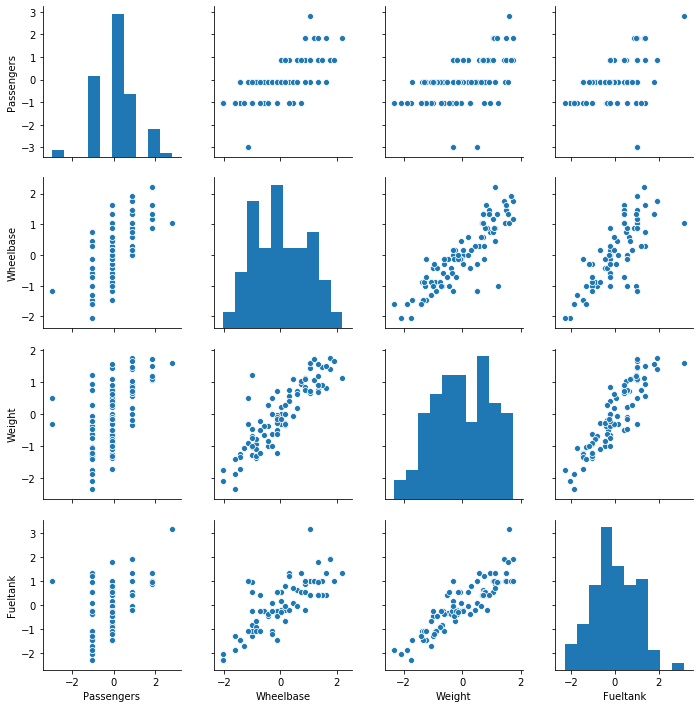

In [20]:
from pandas.plotting import scatter_matrix
import seaborn as sns
# scatter_matrix(df[['Fueltank', 'Weight', 'Wheelbase', 'MPG_Highway']]);

sns.pairplot(df[refined_cols]);

In [30]:
## Check the above link from wikipedia
## and try to figure out what the vif score corresponds to. 

## Let's try show very quickly that our
## interpretation is correct
## We will focus on vif score for 
## Passenger variable only.

In [32]:
# %load -r 35-50 answers.py

In the literature, you might see that it is suggested that if VIF> 10 then this column can  be dropped. Some other resources say if VIF > 5 it is ok to drop a column. Note that these corresponds to $R^{2} = 0.90$ and $R^{2} = 0.80$ respectively. In this case, we can consider to drop 'weight' feature as its VIF >5. Let's see how this effects the model.

In [33]:
X = df[['Passengers', 'Wheelbase', 'Fueltank']]
X = sm.add_constant(X.values)

model = sm.OLS(y, X, hasconst= True)

res = model.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MPG_Highway   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     50.77
Date:                Sun, 13 Oct 2019   Prob (F-statistic):           3.21e-19
Time:                        23:03:44   Log-Likelihood:                -240.73
No. Observations:                  93   AIC:                             489.5
Df Residuals:                      89   BIC:                             499.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.0860      0.341     85.203      0.000      28.408      29.764
x1            -0.8302      0.480     -1.730      0.087      -1.784       0.123
x2             0.4075      0.648      0.629      0.531      -0.881       1.696
x3            -4.1077      0.529     -7.759      0.000      -5.160      -3.056
==============================================================================
Omnibus:                       25.731   Durbin-Watson:                   1.417
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.037
Skew:                           1.002   Prob(JB):                     6.79e-13
Kurtosis:                       6.231   Cond. No.                         3.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
X = df.Weight
X = sm.add_constant(X.values)

model = sm.OLS(y, X, hasconst= True)

res = model.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MPG_Highway   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     174.4
Date:                Wed, 27 Nov 2019   Prob (F-statistic):           7.18e-23
Time:                        11:34:39   Log-Likelihood:                -237.33
No. Observations:                  93   AIC:                             478.7
Df Residuals:                      91   BIC:                             483.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.0860      0.325     89.360      0.000      28.439      29.733
x1            -4.3222      0.327    -13.207      0.000      -4.972      -3.672
==============================================================================
Omnibus:                       18.951   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.353
Skew:                           0.825   Prob(JB):                     9.43e-08
Kurtosis:                       5.373   Cond. No.                         1.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After we dropped the 'weight' the score ($R_{adj}$) dropped from 0.713 to 0.619.

Also we could use forward and backward selection methods.

In [24]:
## sklearn.feature_selection has a class
## called RFE for recursive feature selection

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

For more details and the documentation of RFE you can check:

[sklearn- Recursive Feature Elimination](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)

[Feature Selection in sklearn](https://scikit-learn.org/stable/modules/feature_selection.html#rfe)

In [91]:
## instantiate the linear regression object
lm = LinearRegression()
## instantiate the selector object
selector = RFE(lm, n_features_to_select=2)
X = df.drop(columns= 'MPG_Highway')
y = df.MPG_Highway

## fit the model
selector.fit(X, y)

## check which columns are selected
ind = selector.get_support()
print(ind)

## Note that we got different columns
X.loc[:, ind].head()

[False False False False False False False False False False  True False
  True]


,Dropweight,Wheelbasetoweight
0,0.475759,0.537832
1,-0.725124,-0.462505
2,-0.887578,-0.847706
3,-0.510381,-0.679557
4,-1.139315,-0.899007


In [80]:
## let's compare the R2 scores with these predictors
lm3 = selector.estimator_

R2 = lm3.score(X.loc[:, ind],y)
print(R2)

0.7600439469159661


Sklearn library returns $R^{2}$-score and we can easily convert it to an adjusted $R^{2}$ by using the formula:

$$ \bar{R}^{2} = 1 - (1- R^{2})\frac{n-1}{n-p-1}$$

where $p$ is the total number of features used to train model.

[Wikipedia-$R^{2}$](https://en.wikipedia.org/wiki/Coefficient_of_determination#Adjusted_R2)

In [81]:
## We can also calculate adjusted R2 score 
## directly from R2
1 - (1-R2)*(len(y) - 1)/(len(y) - sum(ind) - 1)


0.7547115901807654

In [95]:
# %load -r 54-55 answers.py
R2_adj = 1- (1-R2)*(len(y)-1)/(len(y) - 3 - 1)
print(R2_adj)

0.7519555406322347


## Normality of Errors and Residual Plots

In [84]:
# X = df[['Weight', 'Wheelbase', 'Fueltank']]
y_predict = lm3.predict(X.loc[:, ind])

residuals = y - y_predict

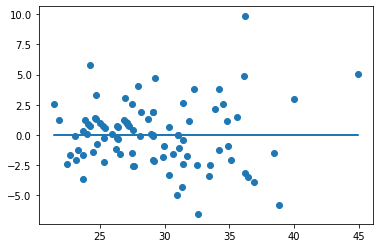

In [85]:
plt.scatter(y_predict, residuals)
plt.plot(y_predict, [0 for i in range(len(df))])

plt.show()

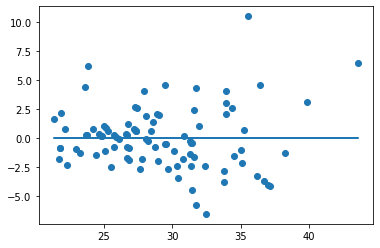

In [64]:
import numpy as np
X = np.array(df.Dropweight).reshape(-1, 1)
y_predict = lm3.predict(X)

residuals = y - y_predict
plt.scatter(y_predict, residuals)
plt.plot(y_predict, [0 for i in range(len(df))])

plt.show()

In [86]:
import scipy.stats as stats

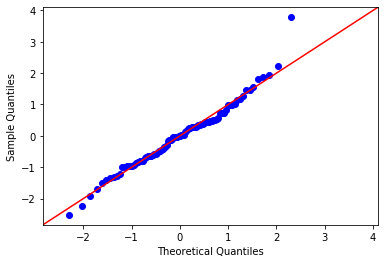

In [87]:
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

## Potential Problems in Multiple Linear Regression

In a perfect linear regression model we expect no pattern in the residual plots. In that sense, any pattern in the residual plots corresponds to a violation of assumptions.

- 1. Non-linearity of the data

U shape patter suggests that we have a non-linear relation between the predictors and the target. In thsi case adding $\log{X}$, $\sqrt{X}$ or $X^{2}$ terms to the model might be helpful.

<img src='img/non_linearity.png' width=550>

- 2. Correlation of the Error Terms 

This means the errors $\epsilon_{1}, \dots, \epsilon_{i}$ tells nothing about the error $\epsilon_{i+1}$. If we have correlation between the error terms then confidence intervals are narrower than they should be. 

- A classic example where we might get correlated errors is when we are dealing with time series data.

<img src='img/timeseries_errors.png' width=550>

- 3. Non-constant variance of the errors

Possible solutions: try $\log(Y)$ or $\sqrt{Y}$ transformations, in some cases giving weights to observations.

<img src='img/nonconstant_varience.png' width=550>

- 4. Outliers

<img src='img/outliers.png' width=550>

For more on Studentized residuals, check:

[PennState - Studentized residuals](https://newonlinecourses.science.psu.edu/stat462/node/247/)

[Statsmodel.Stats outliers_influence module documentation](https://www.statsmodels.org/devel/generated/statsmodels.stats.outliers_influence.OLSInfluence.html)


In [89]:
from statsmodels import stats

import numpy as np

In [93]:
X = sm.add_constant(X.loc[:, ind])
model  = sm.OLS(y,X)
results = model.fit()


/usr/local/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


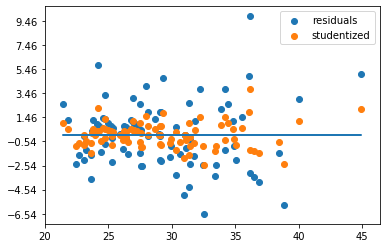

In [94]:
of = stats.outliers_influence.OLSInfluence(results)

plt.scatter(y_predict, residuals, label = 'residuals')
plt.scatter(y_predict, of.resid_studentized, label= 'studentized')
plt.plot(y_predict, [0 for i in range(len(df))])
plt.yticks(np.arange(residuals.min(), residuals.max(), 2))
plt.legend()

Typical expected values are between -3 and 3. So in that sense we can say we don't have outliers in this model.

5. High Leverage Points 

<img src='img/leverage.png' width=550>

For more details on leverage read:

    - p97 of ISLR

[Penn State Stats](https://newonlinecourses.science.psu.edu/stat462/node/171/)

[Statsmodel - Documentation](https://www.statsmodels.org/devel/generated/statsmodels.stats.outliers_influence.OLSInfluence.html)

[A blogpost with implementation](http://songhuiming.github.io/pages/2016/12/31/linear-regression-in-python-chapter-2/)


- 6. Collinearity

Which we discussed earlier.

## Further Reading

To address the collinearity in multiple linear regression we can also use methods like Principal Component Analysis(PCA) and Partial Least Squares (PLS).

[Wikipedia- Partial Least Squares ](https://en.wikipedia.org/wiki/Partial_least_squares_regression)

[Partial Least Squares](http://www.statsoft.com/Textbook/Partial-Least-Squares)

[sklearn - Partial Least Squares](https://scikit-learn.org/stable/modules/generated/sklearn.cross_decomposition.PLSRegression.html#sklearn.cross_decomposition.PLSRegression)